## Import of all packages
First we do a import of all the packages so we can use all the functions

In [12]:
%matplotlib inline
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import geopandas
import geoplot
import geoplot.crs as gcrs


from pandas import DataFrame as df
from scipy.stats import trim_mean, kurtosis
from scipy.stats.mstats import mode, gmean, hmean

# Tennis 

## Constructing a subset of the raw tennis dataset such that we can use it for our analysis

In [8]:
#os.chdir("Dataset/atp-matches-dataset/")

#hvis filen vi danner i forvejen findes slettes den så der kan køres en ny
if os.path.exists("Dataset/atp-matches-dataset/Tennis_mod.csv"):
    os.remove("Dataset/atp-matches-dataset/Tennis_mod.csv")
else:
    print('File does not exists')

#alle filer med format csv medtages og samles i tennis_total
extension = 'csv'
all_filenames = [i for i in glob.glob('Dataset/atp-matches-dataset/*.{}'.format(extension))]
Tennis_total = pd.concat([pd.read_csv(f) for f in all_filenames ])

#Vælger hvilke kolonner i tennis_total vi vil have med og danner det endelige dataset Tennis_mod
keep_col = ['tourney_id','tourney_name','surface','draw_size','winner_ht', 'winner_age', 'winner_rank', 'winner_rank_points','winner_ioc'] 
Tennis_mod=Tennis_total[keep_col]

filter = Tennis_mod["tourney_id"] != ""
Tennis_mod = Tennis_mod[filter]
filter = Tennis_mod["tourney_name"] != ""
Tennis_mod = Tennis_mod[filter]
filter = Tennis_mod["surface"] != ""
Tennis_mod = Tennis_mod[filter]
filter = Tennis_mod["draw_size"] != 0
Tennis_mod = Tennis_mod[filter]
filter = Tennis_mod["winner_ht"] != 0
Tennis_mod = Tennis_mod[filter]
filter = Tennis_mod["winner_age"] != 0
Tennis_mod = Tennis_mod[filter]
filter = Tennis_mod["winner_rank"] != 0
Tennis_mod = Tennis_mod[filter]
filter = Tennis_mod["winner_rank_points"] != 0
Tennis_mod = Tennis_mod[filter]

#Laver tennis_mod til csv som gemmes i samme mappe med stien
Tennis_mod.to_csv( "Dataset/atp-matches-dataset/Tennis_mod.csv", index=False, encoding='utf-8-sig')

#et stk. printet samlet tabel
Tennis_mod.head()

,tourney_id,tourney_name,surface,draw_size,winner_ht,winner_age,winner_rank,winner_rank_points,winner_ioc
0,2008-338,Sydney,Hard,32,185.0,21.555099,8.0,1930.0,FRA
1,2008-338,Sydney,Hard,32,185.0,25.070500,35.0,853.0,RUS
2,2008-338,Sydney,Hard,32,175.0,29.609856,51.0,621.0,FRA
3,2008-338,Sydney,Hard,32,188.0,24.145106,27.0,1050.0,ESP
4,2008-338,Sydney,Hard,32,178.0,35.077344,37.0,792.0,FRA


## A short descriptive introduction the the dataset

Text(0.5, 1.0, 'Percentage White Residents, 2000')

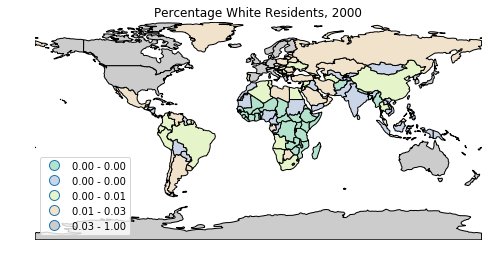

In [18]:
path = geopandas.datasets.get_path('naturalearth_lowres')
df = geopandas.read_file(path)
# Add a column we'll use later
df['gdp_pp'] = df['gdp_md_est'] / df['pop_est']

boroughs = geopandas.read_file(geopandas.datasets.get_path('nybb')).to_crs(epsg='4326')
injurious_collisions = geopandas.read_file(
    "https://github.com/ResidentMario/geoplot-data/raw/master/nyc-injurious-collisions.geojson")

geoplot.choropleth(df, hue='gdp_pp', cmap='Pastel2', legend=True, figsize=(8, 4))
plt.title("Percentage White Residents, 2000")